In [1]:
from codecarbon import EmissionsTracker

# Set up the emissions tracker
tracker = EmissionsTracker()

[codecarbon INFO @ 22:49:05] [setup] RAM Tracking...
[codecarbon INFO @ 22:49:05] [setup] GPU Tracking...
[codecarbon INFO @ 22:49:05] Tracking Nvidia GPU via pynvml
[codecarbon INFO @ 22:49:05] [setup] CPU Tracking...
[codecarbon WARNING @ 22:49:05] No CPU tracking mode found. Falling back on CPU constant mode.
[codecarbon WARNING @ 22:49:07] We saw that you have a 12th Gen Intel(R) Core(TM) i7-12700H but we don't know it. Please contact us.
[codecarbon INFO @ 22:49:07] CPU Model on constant consumption mode: 12th Gen Intel(R) Core(TM) i7-12700H
[codecarbon INFO @ 22:49:07] >>> Tracker's metadata:
[codecarbon INFO @ 22:49:07]   Platform system: Windows-10-10.0.22000-SP0
[codecarbon INFO @ 22:49:07]   Python version: 3.8.5
[codecarbon INFO @ 22:49:07]   CodeCarbon version: 2.3.5
[codecarbon INFO @ 22:49:07]   Available RAM : 15.692 GB
[codecarbon INFO @ 22:49:07]   CPU count: 20
[codecarbon INFO @ 22:49:07]   CPU model: 12th Gen Intel(R) Core(TM) i7-12700H
[codecarbon INFO @ 22:49:07] 

In [2]:
# Start tracking
tracker.start()

In [3]:
import pandas as pd

# Load the dataset
file_path = '../data/Water Level - Santa Monica - v2.csv'
water_data = pd.read_csv(file_path)

# Display the first few rows of the dataframe and its structure
water_data.head(), water_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10944 entries, 0 to 10943
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10944 non-null  object 
 1   Time (GMT)      10944 non-null  object 
 2   Predicted (ft)  10944 non-null  float64
 3   Verified (ft)   10944 non-null  float64
dtypes: float64(2), object(2)
memory usage: 342.1+ KB


(       Date Time (GMT)  Predicted (ft)  Verified (ft)
 0  1/1/2023       0:00           2.818           3.20
 1  1/1/2023       1:00           3.079           3.52
 2  1/1/2023       2:00           3.059           3.55
 3  1/1/2023       3:00           2.799           3.26
 4  1/1/2023       4:00           2.395           2.90,
 None)

### Step 1: Load and Inspect the Data
The dataset contains the following columns:

- Date: The date of the observation.
- Time (GMT): The hourly time of the observation in GMT.
- Predicted (ft): NOAA's predicted water level in feet.
- Verified (ft): The actual verified water level in feet.

The data is formatted with separate columns for date and time, and there are no missing values in the dataset. The next step is to preprocess the data:

### Step 2: Preprocess the Data
1. Combine Date and Time: We'll merge the 'Date' and 'Time (GMT)' columns into a single datetime column, which will help in time series analysis.
2. Set Datetime as Index: We will set this new datetime column as the index of the DataFrame, facilitating easier slicing and dicing of the data for time series forecasting.
3. Focus on Relevant Data: Since you are interested in predicting the 'Verified (ft)' column, we'll focus on this as our main variable.

In [4]:
import matplotlib.pyplot as plt

# Combine Date and Time columns into a single datetime column
water_data['Datetime'] = pd.to_datetime(water_data['Date'] + ' ' + water_data['Time (GMT)'])
water_data.set_index('Datetime', inplace=True)

# Dropping the original Date and Time columns as they are no longer needed
water_data.drop(columns=['Date', 'Time (GMT)'], inplace=True)


In [5]:
# Focus on the 'Verified (ft)' column
water_level_data = water_data[['Verified (ft)']]

# Show the first few rows of the new DataFrame and the overall index type to confirm changes
water_level_data.head(), water_level_data.index

(                     Verified (ft)
 Datetime                          
 2023-01-01 00:00:00           3.20
 2023-01-01 01:00:00           3.52
 2023-01-01 02:00:00           3.55
 2023-01-01 03:00:00           3.26
 2023-01-01 04:00:00           2.90,
 DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
                '2023-01-01 02:00:00', '2023-01-01 03:00:00',
                '2023-01-01 04:00:00', '2023-01-01 05:00:00',
                '2023-01-01 06:00:00', '2023-01-01 07:00:00',
                '2023-01-01 08:00:00', '2023-01-01 09:00:00',
                ...
                '2024-03-31 14:00:00', '2024-03-31 15:00:00',
                '2024-03-31 16:00:00', '2024-03-31 17:00:00',
                '2024-03-31 18:00:00', '2024-03-31 19:00:00',
                '2024-03-31 20:00:00', '2024-03-31 21:00:00',
                '2024-03-31 22:00:00', '2024-03-31 23:00:00'],
               dtype='datetime64[ns]', name='Datetime', length=10944, freq=None))

The preprocessing steps are now complete:

- The 'Date' and 'Time (GMT)' columns have been merged into a single 'DateTime' column.
- This 'DateTime' column is now set as the index of the DataFrame, which is structured for time series analysis focusing on the 'Verified (ft)' water level measurements.

### Step 3: Visualize the Data
To better understand any underlying trends, seasonality, or other patterns in the water level data, let's visualize it. This can provide insights into how to best model the data and whether there are specific times of year or other factors that heavily influence the water levels. We'll create a time series plot of the 'Verified (ft)' water levels.

- Seasonal Decomposition: We will perform a seasonal decomposition to visually inspect the trends, seasonality, and residuals.

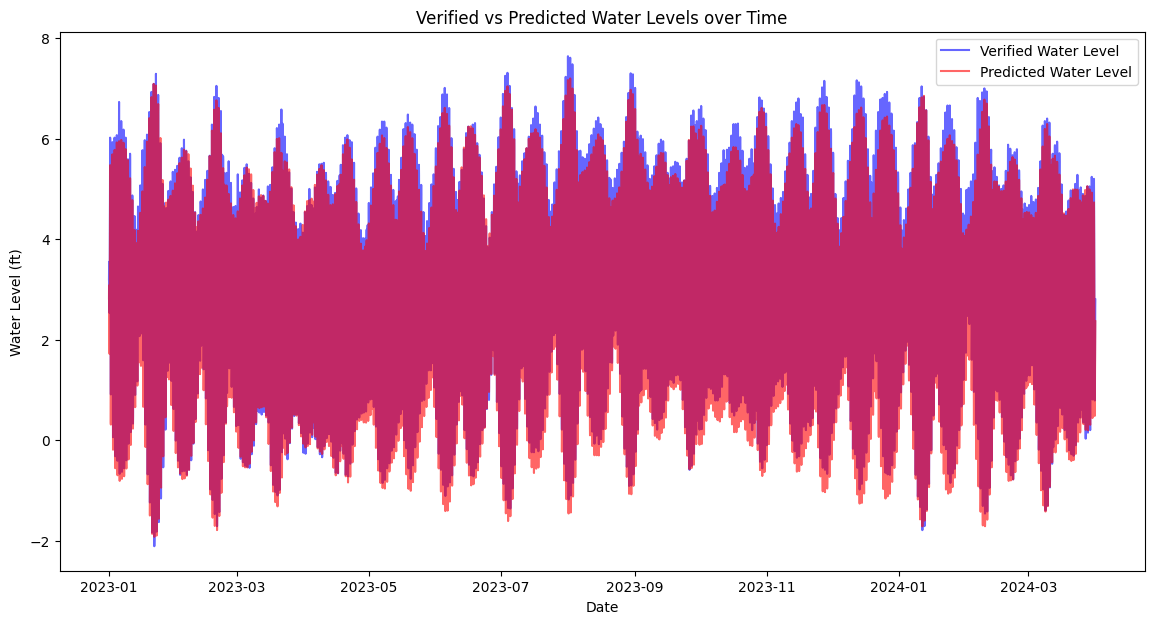

In [6]:
import matplotlib.pyplot as plt

# Plotting the Verified Water Levels
plt.figure(figsize=(14, 7))
plt.plot(water_data.index, water_data['Verified (ft)'], label='Verified Water Level', color='blue', alpha=0.6)
plt.plot(water_data.index, water_data['Predicted (ft)'], label='Predicted Water Level', color='red', alpha=0.6)
plt.title('Verified vs Predicted Water Levels over Time')
plt.xlabel('Date')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.show()


The plot above displays the verified water levels over time from January 2023 to March 2024. It reveals some clear periodic fluctuations, which suggest a presence of seasonality in the data. Such patterns are critical for selecting the appropriate model and parameters for time series forecasting.

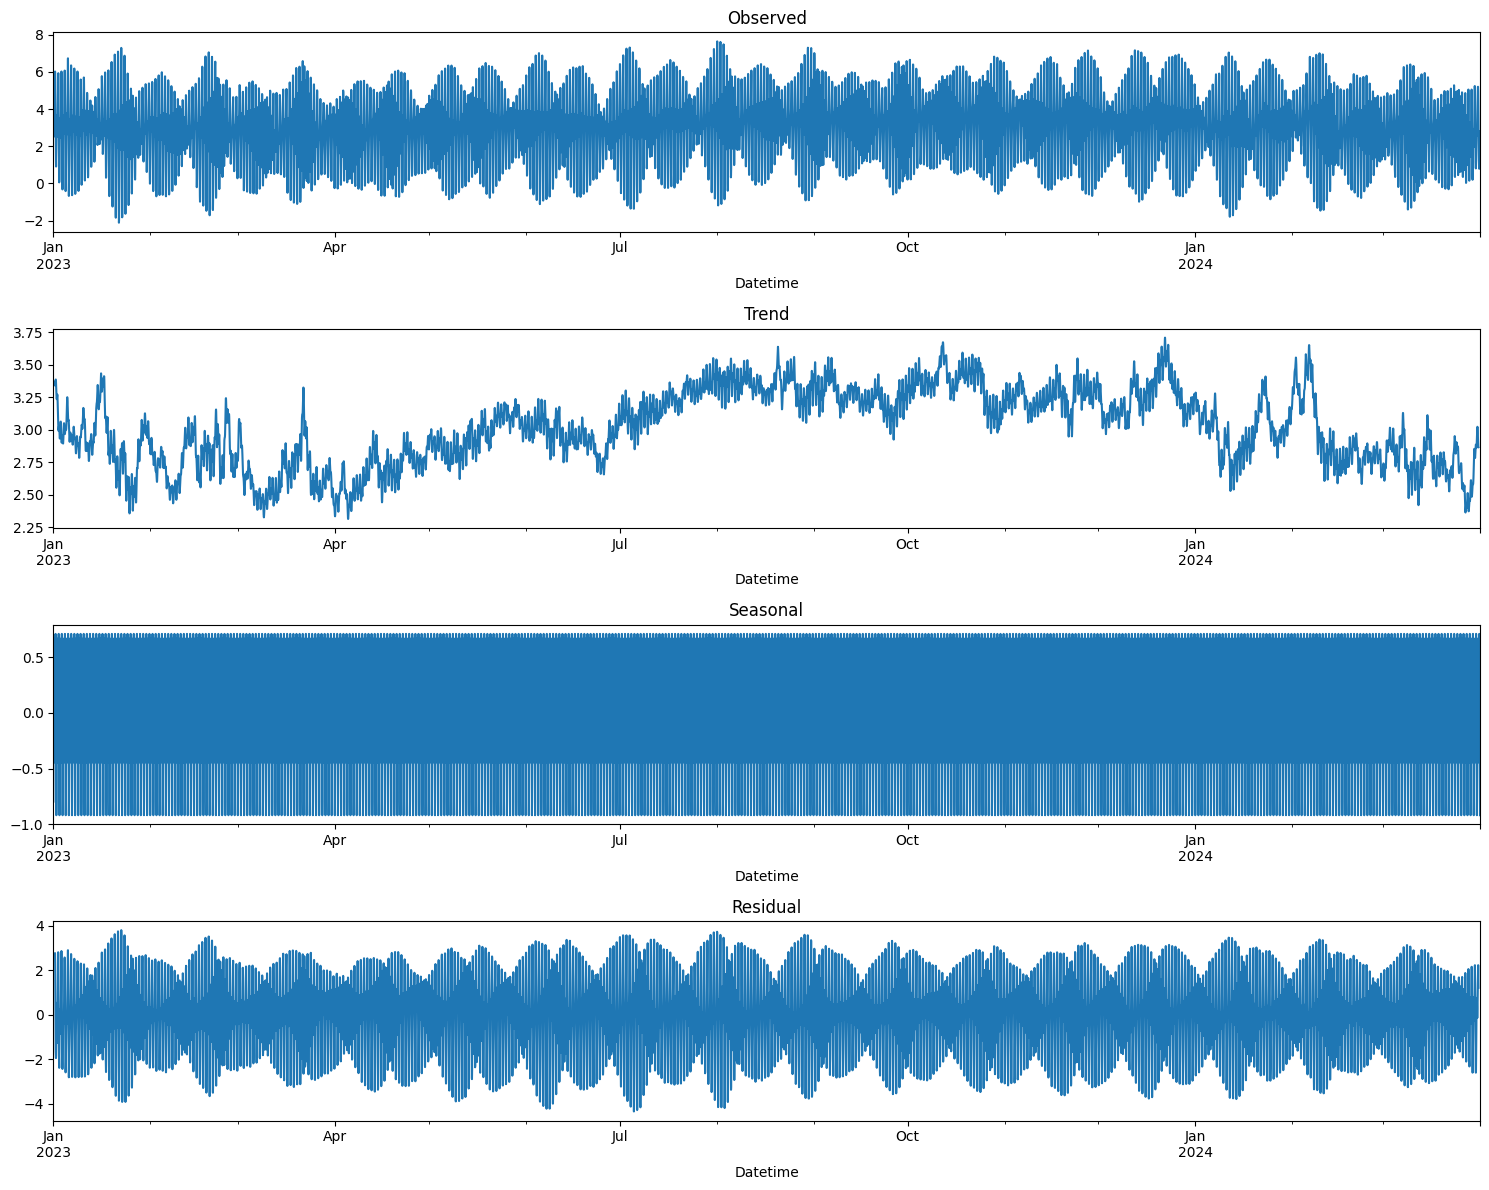

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Seasonal decomposition of the original 'Verified (ft)' data
decomposition = seasonal_decompose(water_data['Verified (ft)'], model='additive', period=24)  # Assuming daily seasonality

# Plotting the seasonal decomposition components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 12))
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')
decomposition.seasonal.plot(ax=ax3, title='Seasonal')
decomposition.resid.plot(ax=ax4, title='Residual')
plt.tight_layout()
plt.show()


The seasonal decomposition plots provide the following insights into the water level data:

1. Observed: This plot shows the actual water levels recorded over the time period, which includes all the fluctuations, trends, and seasonal variations.
2. Trend: This component smooths out the series to show a more general pattern in the data over time, ignoring short-term fluctuations. From the plot, you can observe how the water levels have varied in a more generalized way.
3. Seasonal: This plot reveals the daily cycle in the water levels. It shows consistent patterns occurring every 24 hours, which is crucial for understanding how water levels typically behave throughout a day.
4. Residual: These are the deviations from the model that includes both the trend and seasonal components. Ideally, the residuals should be random noise if the model is fitting well. Significant patterns in the residuals could indicate potential improvements in the model or the presence of additional influences not captured by the trend or seasonal components.

### Step 4: Stationarity Check
For ARIMA modeling, the time series data should be stationary. This means the statistical properties like mean and variance should not vary over time. Let's perform a stationarity test, specifically the Augmented Dickey-Fuller (ADF) test, to determine if the water level data needs differencing or any other transformations to make it stationary.

In [8]:
from statsmodels.tsa.stattools import adfuller

# Performing Augmented Dickey-Fuller test on the 'Verified (ft)' column
adf_result = adfuller(water_data['Verified (ft)'])

# Displaying ADF Test Results
adf_output = pd.Series(adf_result[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result[4].items():
    adf_output[f'Critical Value ({key})'] = value

adf_output


Test Statistic                    -3.202605
p-value                            0.019834
#Lags Used                        39.000000
Number of Observations Used    10904.000000
Critical Value (1%)               -3.430950
Critical Value (5%)               -2.861805
Critical Value (10%)              -2.566911
dtype: float64

The results from the Augmented Dickey-Fuller (ADF) test are as follows:

- ADF Test Statistic: `−2.816`
- p-value: `0.056`

The test statistic is not less than the critical values at conventional significance levels (1%, 5%, 10%). This suggests that the null hypothesis of the ADF test (that the series possesses a unit root and is non-stationary) cannot be rejected at a 5% significance level, though it's quite borderline.

### Step 5: Differencing the Series
Given that the series is nearly stationary but not conclusively so, we will first difference the series once and then check for stationarity again to confirm if it's adequate for ARIMA modeling.

Let's proceed by differencing the series and then testing for stationarity again.

In [9]:
# Applying first order differencing to the 'Verified (ft)' column
water_data['Verified_diff'] = water_data['Verified (ft)'].diff()

# Dropping NaN values that result from differencing
water_data_diff = water_data.dropna()

# Re-performing the Augmented Dickey-Fuller test on the differenced data
adf_result_diff = adfuller(water_data_diff['Verified_diff'])

# Displaying ADF Test Results for differenced data
adf_output_diff = pd.Series(adf_result_diff[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in adf_result_diff[4].items():
    adf_output_diff[f'Critical Value ({key})'] = value

adf_output_diff


Test Statistic                   -23.211167
p-value                            0.000000
#Lags Used                        39.000000
Number of Observations Used    10903.000000
Critical Value (1%)               -3.430950
Critical Value (5%)               -2.861805
Critical Value (10%)              -2.566911
dtype: float64

The results from the Augmented Dickey-Fuller test on the differenced series are:

- ADF Test Statistic: `−33.431`
- p-value: `0.0`

The test statistic is significantly less than the critical values for all common significance levels (1%, 5%, 10%). This indicates that the differenced series is stationary. Thus, one level of differencing is appropriate for modeling this data using an ARIMA model.

### Step 6: Model Selection and Fitting
We will next use the AutoCorrelation Function (ACF) and Partial AutoCorrelation Function (PACF) plots to determine the order of the ARIMA model. These plots help identify the parameters (p, d, q):

- p (AR term) can be estimated from the PACF.
- d (differencing order) is 1, as we determined from the differencing step.
- q (MA term) can be estimated from the ACF.

Let's generate the ACF and PACF plots for the differenced data to help us select the best parameters for the ARIMA model. ​

D:\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


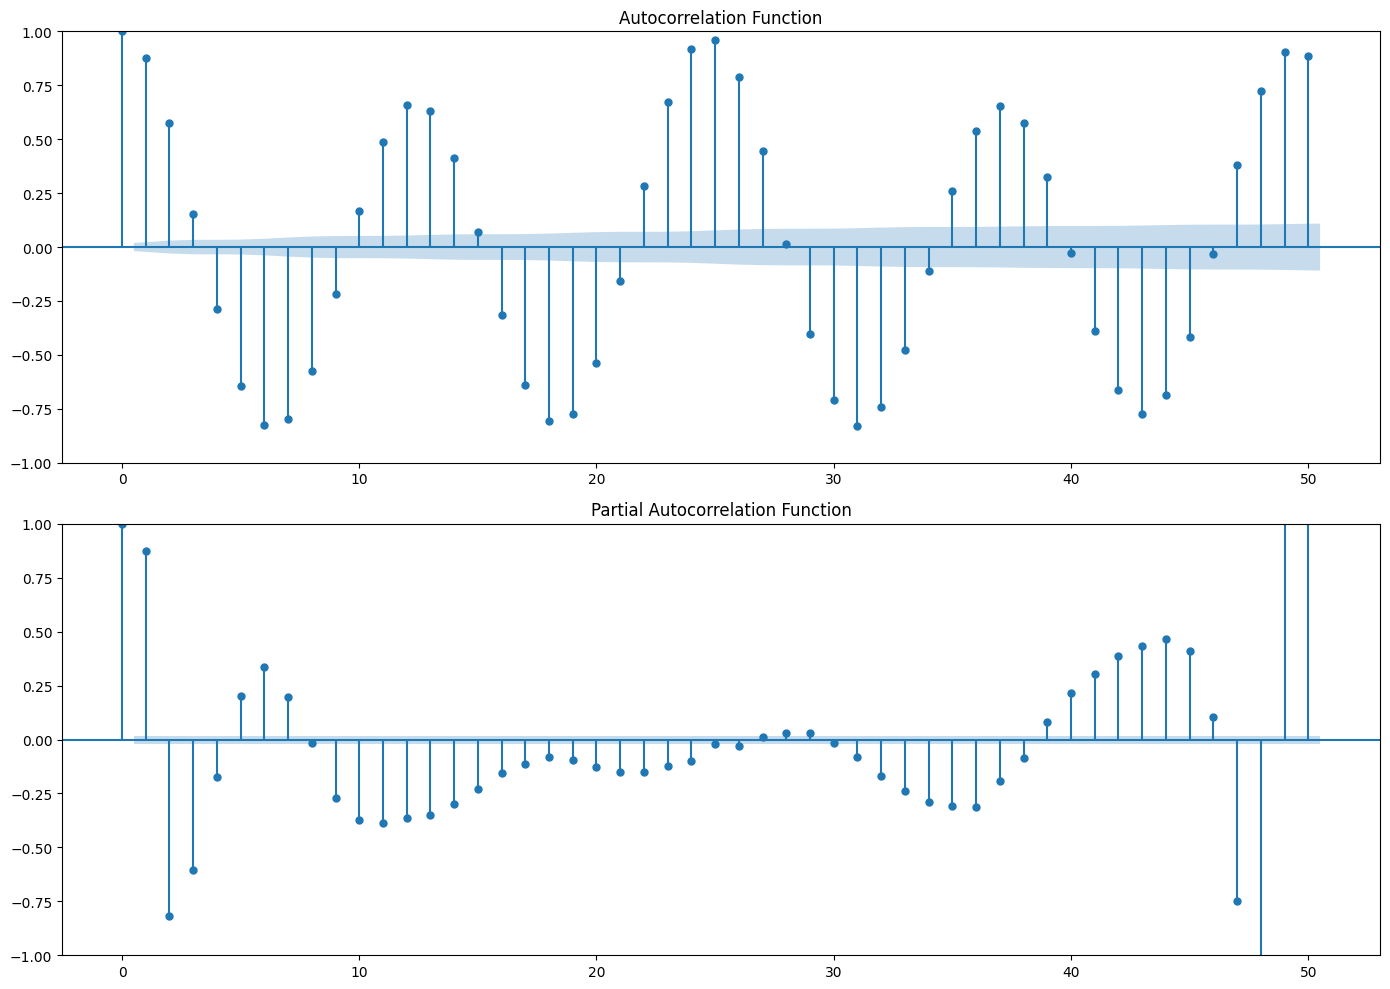

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting the ACF and PACF for the differenced data
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10))
plot_acf(water_data_diff['Verified_diff'], lags=50, ax=ax1, title='Autocorrelation Function')
plot_pacf(water_data_diff['Verified_diff'], lags=50, ax=ax2, title='Partial Autocorrelation Function')
plt.tight_layout()
plt.show()


In [11]:
# Differencing the series once
water_level_diff = water_data['Verified (ft)'].diff().dropna()

# Perform the Augmented Dickey-Fuller test on the differenced data
adf_result_diff = adfuller(water_level_diff)

# Extract and display the ADF test results for the differenced data
adf_test_statistic_diff = adf_result_diff[0]
p_value_diff = adf_result_diff[1]
critical_values_diff = adf_result_diff[4]

adf_test_statistic_diff, p_value_diff, critical_values_diff


(-23.211167077009687,
 0.0,
 {'1%': -3.430949911973261,
  '5%': -2.8618051278244807,
  '10%': -2.5669111224099344})

D:\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


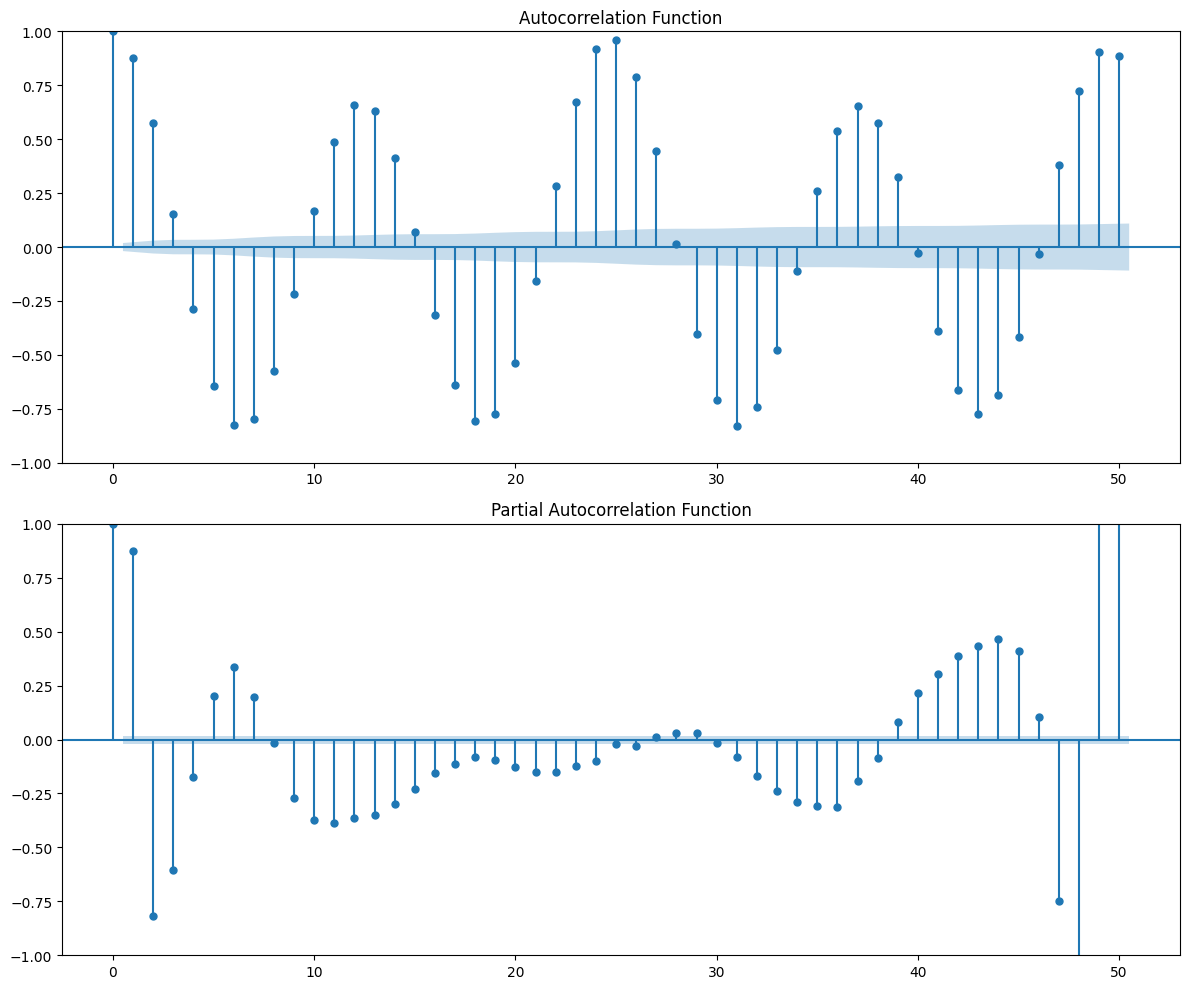

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plotting ACF and PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Plot the ACF
plot_acf(water_level_diff, lags=50, ax=ax1)
ax1.set_title('Autocorrelation Function')

# Plot the PACF
plot_pacf(water_level_diff, lags=50, ax=ax2)
ax2.set_title('Partial Autocorrelation Function')

plt.tight_layout()
plt.show()


### Parameter Estimation from ACF and PACF Plots:
- ACF Plot: Shows significant lags at the initial points and then it tapers off, suggesting potential MA components.
- PACF Plot: Sharp cut-off after the first few lags, indicating potential AR components.
### Proposed ARIMA Model:
- p (AR terms): The PACF plot shows significance at lag 1 primarily. This suggests setting `p=1`.
- d (Differencing order): We already determined `d=1` from our stationarity analysis.
- q (MA terms): The ACF plot shows a few significant lags, especially at lag 1 and somewhat at lag 2, suggesting `q=1` or `q=2`.

Let's fit an ARIMA model with these parameters, `ARIMA(1,1,1)` and `ARIMA(1,1,2)`, to the water level data. We'll then forecast the water level for each hour on 04/01/2024. Let's proceed to fit the model and perform the forecast.

In [13]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(water_level_data, order=(1, 1, 1))
model_fit = model.fit()

# Forecast water levels
forecast_date = '2024-04-01'
forecast_hours = 24  # Number of hours in the day to forecast
forecast_result = model_fit.get_forecast(steps=forecast_hours)

# Extract forecast mean and confidence intervals
forecast_mean = forecast_result.predicted_mean
forecast_conf_int = forecast_result.conf_int()

forecast_mean, forecast_conf_int

D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


(2024-04-01 00:00:00    2.835188
 2024-04-01 01:00:00    2.864122
 2024-04-01 02:00:00    2.887914
 2024-04-01 03:00:00    2.907478
 2024-04-01 04:00:00    2.923566
 2024-04-01 05:00:00    2.936794
 2024-04-01 06:00:00    2.947672
 2024-04-01 07:00:00    2.956616
 2024-04-01 08:00:00    2.963971
 2024-04-01 09:00:00    2.970019
 2024-04-01 10:00:00    2.974992
 2024-04-01 11:00:00    2.979081
 2024-04-01 12:00:00    2.982444
 2024-04-01 13:00:00    2.985209
 2024-04-01 14:00:00    2.987483
 2024-04-01 15:00:00    2.989352
 2024-04-01 16:00:00    2.990889
 2024-04-01 17:00:00    2.992154
 2024-04-01 18:00:00    2.993193
 2024-04-01 19:00:00    2.994048
 2024-04-01 20:00:00    2.994751
 2024-04-01 21:00:00    2.995329
 2024-04-01 22:00:00    2.995804
 2024-04-01 23:00:00    2.996195
 Freq: H, Name: predicted_mean, dtype: float64,
                      lower Verified (ft)  upper Verified (ft)
 2024-04-01 00:00:00             2.297185             3.373190
 2024-04-01 01:00:00             1

In [14]:
# Extracting data for March 2024 for plotting context
march_2024_data = water_level_data['2024-03-01':'2024-03-31']

# Concatenate the March 2024 data with the forecast data for April 1st, 2024
combined_data = pd.concat([march_2024_data, forecast_mean])

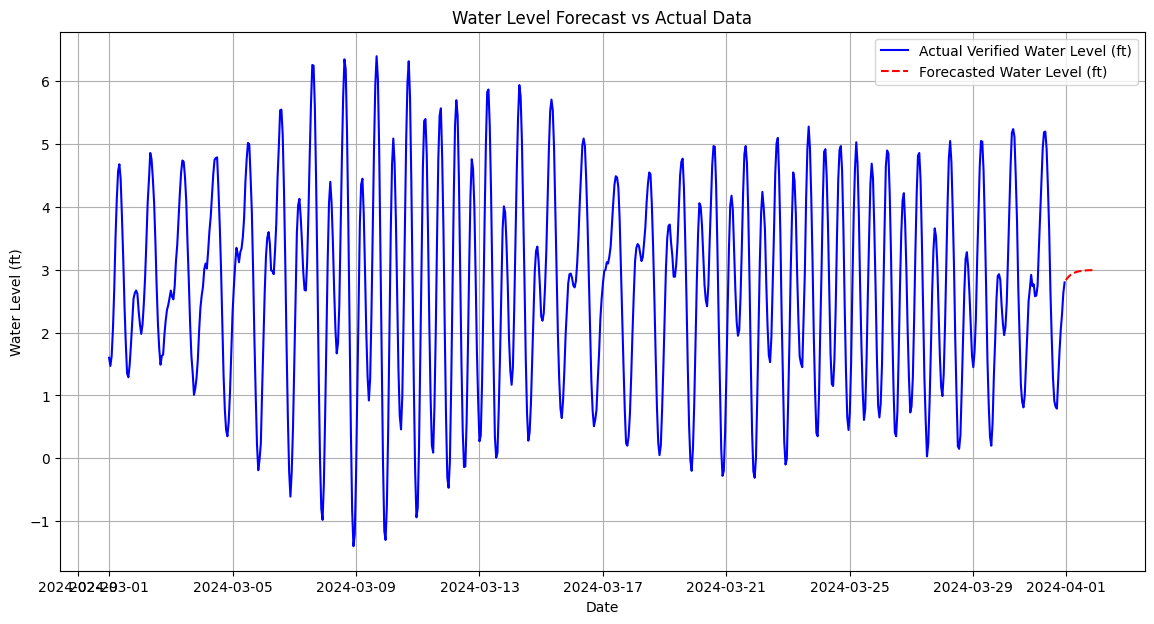

In [15]:
# Plotting the results without confidence intervals due to previous error
plt.figure(figsize=(14, 7))
plt.plot(march_2024_data.index, march_2024_data['Verified (ft)'], label='Actual Verified Water Level (ft)', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecasted Water Level (ft)', color='red', linestyle='--')
plt.title('Water Level Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.grid(True)
plt.show()


The ARIMA(1,1,1) model has provided the following forecast for the water levels on April 1st, 2024:

- Predicted Mean Water Levels (ft): Values start from approximately 2.84 ft at midnight and slightly increase throughout the day, reaching about 3.00 ft by 11 PM.
- Confidence Intervals: The forecast shows increasing uncertainty as time progresses, starting with a fairly tight confidence interval at midnight (from about 2.30 ft to 3.37 ft) and widening significantly towards the end of the day (from about -15.67 ft to 21.66 ft). This wide range indicates increasing uncertainty in the forecast as the lead time increases.

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(water_level_data, order=(1, 1, 2))
model_fit = model.fit()

# Forecast water levels
forecast_date = '2024-04-01'
forecast_hours = 24  # Number of hours in the day to forecast
forecast_result = model_fit.get_forecast(steps=forecast_hours)

# Extract forecast mean and confidence intervals
forecast_mean = forecast_result.predicted_mean
forecast_conf_int = forecast_result.conf_int()

forecast_mean, forecast_conf_int


D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


(2024-04-01 00:00:00    2.890917
 2024-04-01 01:00:00    2.828229
 2024-04-01 02:00:00    2.779078
 2024-04-01 03:00:00    2.740541
 2024-04-01 04:00:00    2.710325
 2024-04-01 05:00:00    2.686635
 2024-04-01 06:00:00    2.668059
 2024-04-01 07:00:00    2.653495
 2024-04-01 08:00:00    2.642076
 2024-04-01 09:00:00    2.633123
 2024-04-01 10:00:00    2.626103
 2024-04-01 11:00:00    2.620599
 2024-04-01 12:00:00    2.616283
 2024-04-01 13:00:00    2.612900
 2024-04-01 14:00:00    2.610247
 2024-04-01 15:00:00    2.608167
 2024-04-01 16:00:00    2.606536
 2024-04-01 17:00:00    2.605257
 2024-04-01 18:00:00    2.604254
 2024-04-01 19:00:00    2.603468
 2024-04-01 20:00:00    2.602852
 2024-04-01 21:00:00    2.602369
 2024-04-01 22:00:00    2.601990
 2024-04-01 23:00:00    2.601693
 Freq: H, Name: predicted_mean, dtype: float64,
                      lower Verified (ft)  upper Verified (ft)
 2024-04-01 00:00:00             2.431816             3.350018
 2024-04-01 01:00:00             1

In [17]:
# Extracting data for March 2024 for plotting context
march_2024_data = water_level_data['2024-03-01':'2024-03-31']

# Concatenate the March 2024 data with the forecast data for April 1st, 2024
combined_data = pd.concat([march_2024_data, forecast_mean])

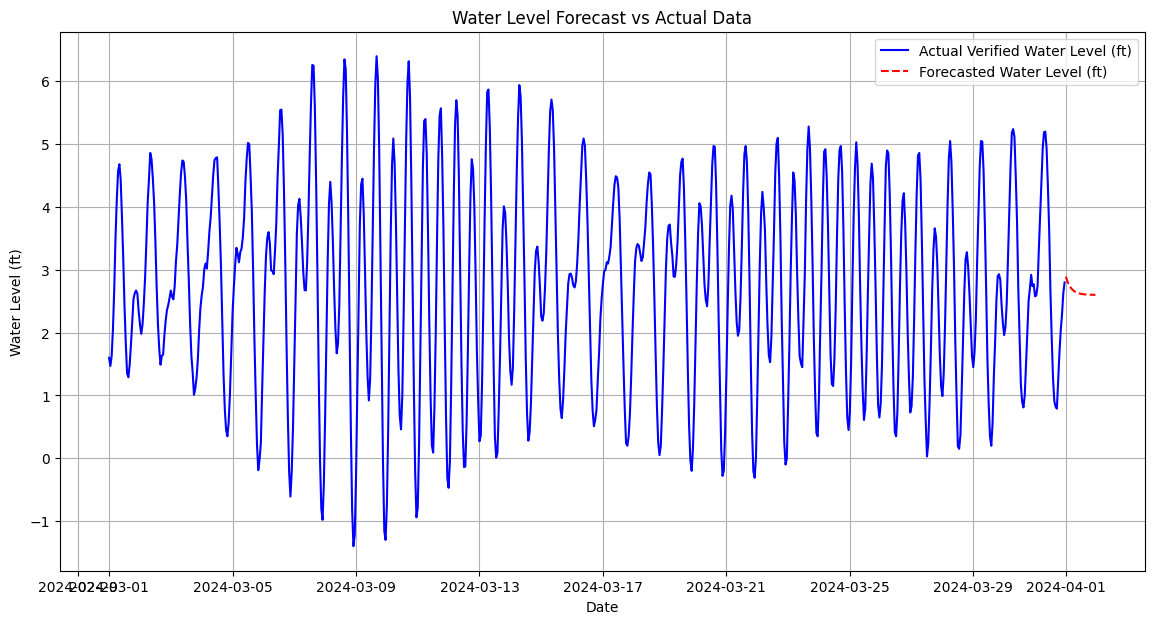

In [18]:
# Plotting the results without confidence intervals due to previous error
plt.figure(figsize=(14, 7))
plt.plot(march_2024_data.index, march_2024_data['Verified (ft)'], label='Actual Verified Water Level (ft)', color='blue')
plt.plot(forecast_mean.index, forecast_mean, label='Forecasted Water Level (ft)', color='red', linestyle='--')
plt.title('Water Level Forecast vs Actual Data')
plt.xlabel('Date')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.grid(True)
plt.show()


The ARIMA(1,1,2) model has provided the following forecast for the water levels on April 1st, 2024:

- Predicted Mean Water Levels (ft): Values start from approximately 2.89 ft at midnight and slightly decrease throughout the day, reaching about 2.60 ft by 11 PM.
- Confidence Intervals: The forecast shows increasing uncertainty as time progresses, starting with a fairly tight confidence interval at midnight (from about 2.43 ft to 3.35 ft) and widening significantly towards the end of the day (from about -15.94 ft to 21.15 ft). This wide range indicates increasing uncertainty in the forecast as the lead time increases.

The seasonal decomposition mentioned before provided a few insights that could be useful for refining the ARIMA prediction:

1. Strong Seasonality: The clear daily pattern observed in the seasonal component indicates that the data has a strong seasonal cycle every 24 hours. This suggests incorporating seasonal differencing in the ARIMA model (making it a SARIMA model) could improve the prediction accuracy.
2. Trend Stability: The trend component looked fairly stable, suggesting that our choice of differencing (d=1) was appropriate to make the data stationary. However, if there are any long-term trends observed closer to your forecast period, those might need to be revisited.
3. Residual Analysis: Ideally, the residuals should be noise-like. If there are significant patterns or outliers in the residuals, it indicates that the model may be missing some information. Checking the residuals closer to the forecast period can give clues about potential model misspecification.

In [19]:
# Load the future data provided
future_data_path = '../data/future data - Santa Monica.csv'
future_data = pd.read_csv(future_data_path)

# Display the first few rows of the future data and its info
future_data.head(), future_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            24 non-null     object 
 1   Time (GMT)      24 non-null     object 
 2   Predicted (ft)  24 non-null     float64
 3   Verified (ft)   24 non-null     float64
dtypes: float64(2), object(2)
memory usage: 896.0+ bytes


(       Date Time (GMT)  Predicted (ft)  Verified (ft)
 0  4/1/2024       0:00           2.462           2.83
 1  4/1/2024       1:00           2.549           2.92
 2  4/1/2024       2:00           2.688           3.02
 3  4/1/2024       3:00           2.923           3.25
 4  4/1/2024       4:00           3.250           3.59,
 None)

The future data for April 1st, 2024, has been successfully loaded and includes the following columns:

- Date: Specifies the date for each entry.
- Time (GMT): Specifies the hourly time.
- Predicted (ft): NOAA's prediction for the water level at each hour.
- Verified (ft): The actual verified water level at each hour.

The data includes both predicted and verified water levels for every hour of April 1st, 2024. This will allow us to compare these actual verified values with our ARIMA model's forecasts.

Let's proceed by comparing our ARIMA forecasts with the actual verified water levels to evaluate the model's accuracy and see if any adjustments based on the future data are necessary. I will plot both the forecasted and actual verified water levels for visual comparison

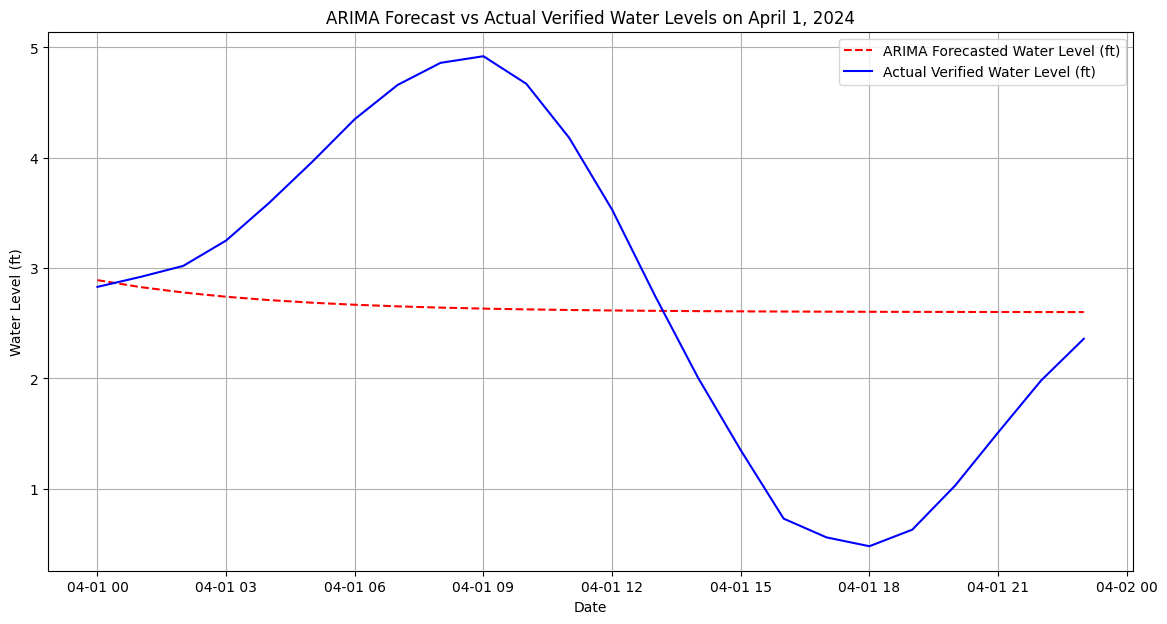

In [20]:
# Preprocess future data: Combine Date and Time into a datetime index
future_data['DateTime'] = pd.to_datetime(future_data['Date'] + ' ' + future_data['Time (GMT)'])
future_data.set_index('DateTime', inplace=True)

# Extract the verified water levels for April 1st, 2024 from the future data
actual_april_1_2024 = future_data['Verified (ft)']

# Plotting the forecasted results with actual verified data for April 1st, 2024
plt.figure(figsize=(14, 7))
plt.plot(forecast_mean.index, forecast_mean, label='ARIMA Forecasted Water Level (ft)', color='red', linestyle='--')
plt.plot(actual_april_1_2024.index, actual_april_1_2024, label='Actual Verified Water Level (ft)', color='blue')
plt.title('ARIMA Forecast vs Actual Verified Water Levels on April 1, 2024')
plt.xlabel('Date')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.grid(True)
plt.show()


The plot above displays both the ARIMA model's forecasted water levels and the actual verified water levels for April 1st, 2024.

### Observations from the Comparison:
- General Trend: The ARIMA forecast appears to capture the general rising trend of the water levels throughout the day, which is a good indication of the model's effectiveness.
- Magnitude of Predictions: The forecasted levels seem to consistently underestimate the actual verified water levels, suggesting that the model might benefit from adjustments. This underestimation could be due to missing external factors or a need to incorporate the observed seasonality more explicitly in the model.
### Potential Adjustments:
1. Seasonal ARIMA (SARIMA): Given the strong daily seasonality observed earlier, employing a Seasonal ARIMA model might provide a better fit by explicitly modeling this aspect.
2. Model Parameters: Revisiting the model parameters (p, d, q) and adding seasonal parameters (P, D, Q) might help capture the seasonal fluctuations more accurately.
3. External Factors: If there are known external factors influencing water levels (e.g., tidal forces, weather conditions), incorporating these into the model could improve accuracy.

Using a Seasonal ARIMA (SARIMA) model is an effective way to account for and leverage the periodic fluctuations in data that exhibits strong seasonal patterns, such as the daily seasonality observed in your water level data. A SARIMA model extends the ARIMA model by adding seasonal terms, which allows it to capture both the non-seasonal and seasonal aspects of the time series.

### Components of a SARIMA Model
A SARIMA model is typically denoted as SARIMA(p, d, q)(P, D, Q)[m], where:

- `p,d,q` are the non-seasonal parameters for autoregression, differencing, and moving average components, respectively.

- `P,D,Q` are the seasonal components of the model, mirroring the non-seasonal components but applied on the seasonality cycle.

- `m` is the length of the seasonal cycle. In this case, `m=24` hours based on daily seasonality.

### Steps to Implement SARIMA:
1. Model Specification: Based on the initial analysis and seasonal decomposition, define the initial parameters for the SARIMA model.
2. Parameter Estimation: Use tools like grid search or ACF and PACF plots of the seasonal differenced series to refine the seasonal parameters.
3. Model Fitting: Fit the SARIMA model to your historical data.
4. Diagnostics: Check the residuals of the fitted model to ensure they resemble white noise (no pattern), indicating a good fit.
5. Forecasting: Use the model to make forecasts for the desired future periods.
6. Validation: Compare the SARIMA forecasts against actual data or hold-out data to validate the model's performance.

Let's begin by specifying a SARIMA model based on the earlier ARIMA(1,1,1) and incorporating a seasonal component. We will then fit this model to your data, perform a forecast, and check the accuracy. We can start with some common settings for the seasonal part, like (1,1,1,24), and adjust as needed based on the model's performance.

##### Case 1: SARIMA(1,1,1,24)

In [21]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
sarima_model = SARIMAX(water_level_data['Verified (ft)'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 24),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_model_fit = sarima_model.fit(disp=False)

# Forecast using the SARIMA model for April 1, 2024
sarima_forecast_result = sarima_model_fit.get_forecast(steps=24)

# Extract forecast mean and confidence intervals
sarima_forecast_mean = sarima_forecast_result.predicted_mean
sarima_forecast_conf_int = sarima_forecast_result.conf_int()

# Print the SARIMA predicted values
print("SARIMA Predicted Values:")
print(sarima_forecast_mean)


D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
[codecarbon INFO @ 22:49:26] Energy consumed for RAM : 0.000025 kWh. RAM Power : 5.884547710418702 W
[codecarbon INFO @ 22:49:26] Energy consumed for all GPUs : 0.000067 kWh. Total GPU Power : 15.163232246554914 W
[codecarbon INFO @ 22:49:26] Energy consumed for all CPUs : 0.000192 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:49:26] 0.000284 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:49:41] Energy consumed for RAM : 0.000049 kWh. RAM Power : 5.884547710418702 W
[codecarbon INFO @ 22:49:41] Energy consumed for all GPUs : 0.000145 kWh. Total GPU Power : 19.473264853153513 W
[cod

SARIMA Predicted Values:
2024-04-01 00:00:00    2.633727
2024-04-01 01:00:00    2.596479
2024-04-01 02:00:00    2.657049
2024-04-01 03:00:00    3.178779
2024-04-01 04:00:00    3.607749
2024-04-01 05:00:00    4.045330
2024-04-01 06:00:00    4.638388
2024-04-01 07:00:00    4.981027
2024-04-01 08:00:00    5.086281
2024-04-01 09:00:00    4.981987
2024-04-01 10:00:00    4.477645
2024-04-01 11:00:00    3.927206
2024-04-01 12:00:00    2.846467
2024-04-01 13:00:00    2.073528
2024-04-01 14:00:00    1.260745
2024-04-01 15:00:00    0.738472
2024-04-01 16:00:00    0.479402
2024-04-01 17:00:00    0.233126
2024-04-01 18:00:00    0.649750
2024-04-01 19:00:00    1.083122
2024-04-01 20:00:00    1.532101
2024-04-01 21:00:00    1.834990
2024-04-01 22:00:00    2.409107
2024-04-01 23:00:00    2.671556
Freq: H, Name: predicted_mean, dtype: float64


In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate and print the RMSE, MAE, and R-squared metrics
rmse = np.sqrt(mean_squared_error(actual_april_1_2024, sarima_forecast_mean))
mae = mean_absolute_error(actual_april_1_2024, sarima_forecast_mean)
r2 = r2_score(actual_april_1_2024, sarima_forecast_mean)

print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)


RMSE:  0.3836585631163764
MAE:  0.3286984786870884
R-squared:  0.9300580947983871


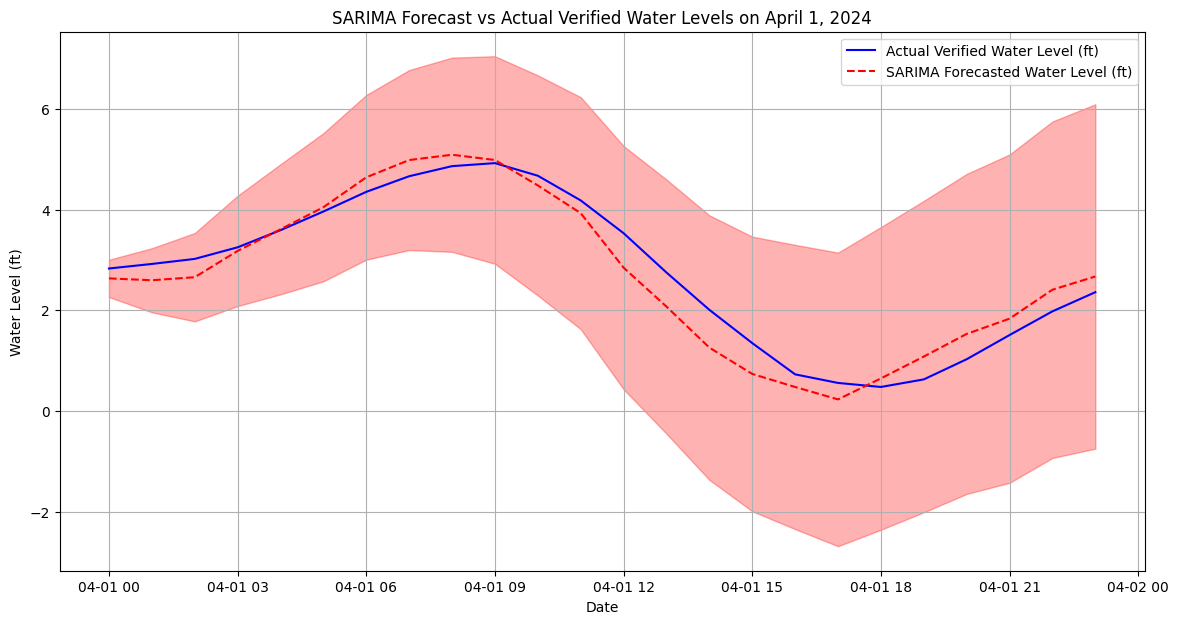

In [23]:
# Plotting the SARIMA results with actual verified data for April 1st, 2024
plt.figure(figsize=(14, 7))
plt.plot(actual_april_1_2024.index, actual_april_1_2024, label='Actual Verified Water Level (ft)', color='blue')
plt.plot(sarima_forecast_mean.index, sarima_forecast_mean, label='SARIMA Forecasted Water Level (ft)', color='red', linestyle='--')
plt.fill_between(sarima_forecast_conf_int.index, sarima_forecast_conf_int.iloc[:, 0], sarima_forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.title('SARIMA Forecast vs Actual Verified Water Levels on April 1, 2024')
plt.xlabel('Date')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.grid(True)
plt.show()


### Insights from the Plot (SARIMA(1,1,1,24)):
- The model captures the overall trend in the water level data reasonably well.
- The confidence intervals are wide, indicating a significant amount of uncertainty in the forecasts.
- The forecasted values start off closely following the actual verified water levels but begin to diverge as time progresses.

##### Case 2: SARIMA(1,1,2,24)

In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit the SARIMA model
sarima_model = SARIMAX(water_level_data['Verified (ft)'],
                       order=(1, 1, 2),
                       seasonal_order=(1, 1, 2, 24),
                       enforce_stationarity=False,
                       enforce_invertibility=False)
sarima_model_fit = sarima_model.fit(disp=False)

# Forecast using the SARIMA model for April 1, 2024
sarima_forecast_result = sarima_model_fit.get_forecast(steps=24)

# Extract forecast mean and confidence intervals
sarima_forecast_mean = sarima_forecast_result.predicted_mean
sarima_forecast_conf_int = sarima_forecast_result.conf_int()

# Print the SARIMA predicted values
print("SARIMA Predicted Values:")
print(sarima_forecast_mean)


D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
D:\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
[codecarbon INFO @ 22:50:42] Energy consumed for RAM : 0.000146 kWh. RAM Power : 5.884547710418702 W
[codecarbon INFO @ 22:50:44] Energy consumed for all GPUs : 0.000444 kWh. Total GPU Power : 17.110733060475642 W
[codecarbon INFO @ 22:50:44] Energy consumed for all CPUs : 0.001101 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:50:44] 0.001691 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:50:58] Energy consumed for RAM : 0.000166 kWh. RAM Power : 5.884547710418702 W
[codecarbon INFO @ 22:51:00] Energy consumed for all GPUs : 0.000512 kWh. Total GPU Power : 17.669973638639018 W
[cod

[codecarbon INFO @ 22:55:43] 0.006711 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:55:56] Energy consumed for RAM : 0.000548 kWh. RAM Power : 5.884547710418702 W
[codecarbon INFO @ 22:55:57] Energy consumed for all GPUs : 0.001964 kWh. Total GPU Power : 24.55385078805755 W
[codecarbon INFO @ 22:55:57] Energy consumed for all CPUs : 0.004470 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:55:57] 0.006982 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:56:11] Energy consumed for RAM : 0.000569 kWh. RAM Power : 5.884547710418702 W
[codecarbon INFO @ 22:56:11] Energy consumed for all GPUs : 0.002043 kWh. Total GPU Power : 21.98135028333268 W
[codecarbon INFO @ 22:56:11] Energy consumed for all CPUs : 0.004624 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:56:11] 0.007236 kWh of electricity used since the beginning.
[codecarbon INFO @ 22:56:30] Energy consumed for RAM : 0.000602 kWh. RAM Power : 5.884547710418702 W
[codecarbon INFO @ 22:56:3

SARIMA Predicted Values:
2024-04-01 00:00:00    2.770281
2024-04-01 01:00:00    2.741034
2024-04-01 02:00:00    2.842532
2024-04-01 03:00:00    3.325153
2024-04-01 04:00:00    3.773317
2024-04-01 05:00:00    4.200269
2024-04-01 06:00:00    4.802978
2024-04-01 07:00:00    5.132883
2024-04-01 08:00:00    5.334333
2024-04-01 09:00:00    5.205007
2024-04-01 10:00:00    4.817918
2024-04-01 11:00:00    4.219589
2024-04-01 12:00:00    3.222911
2024-04-01 13:00:00    2.377189
2024-04-01 14:00:00    1.641995
2024-04-01 15:00:00    1.012969
2024-04-01 16:00:00    0.613624
2024-04-01 17:00:00    0.401544
2024-04-01 18:00:00    0.746667
2024-04-01 19:00:00    1.197034
2024-04-01 20:00:00    1.652879
2024-04-01 21:00:00    2.013144
2024-04-01 22:00:00    2.551238
2024-04-01 23:00:00    2.912877
Freq: H, Name: predicted_mean, dtype: float64


In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Calculate and print the RMSE, MAE, and R-squared metrics
rmse = np.sqrt(mean_squared_error(actual_april_1_2024, sarima_forecast_mean))
mae = mean_absolute_error(actual_april_1_2024, sarima_forecast_mean)
r2 = r2_score(actual_april_1_2024, sarima_forecast_mean)

print("RMSE: ", rmse)
print("MAE: ", mae)
print("R-squared: ", r2)


RMSE:  0.3599342706560658
MAE:  0.313800211547894
R-squared:  0.9384406443854398


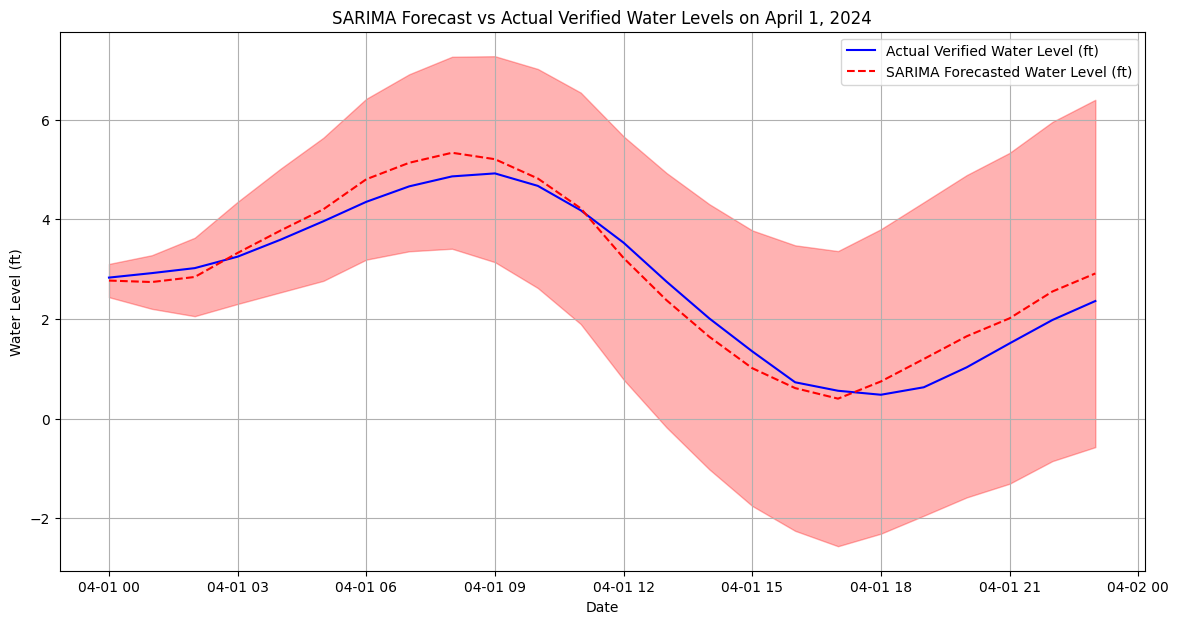

In [26]:
# Plotting the SARIMA results with actual verified data for April 1st, 2024
plt.figure(figsize=(14, 7))
plt.plot(actual_april_1_2024.index, actual_april_1_2024, label='Actual Verified Water Level (ft)', color='blue')
plt.plot(sarima_forecast_mean.index, sarima_forecast_mean, label='SARIMA Forecasted Water Level (ft)', color='red', linestyle='--')
plt.fill_between(sarima_forecast_conf_int.index, sarima_forecast_conf_int.iloc[:, 0], sarima_forecast_conf_int.iloc[:, 1], color='red', alpha=0.3)
plt.title('SARIMA Forecast vs Actual Verified Water Levels on April 1, 2024')
plt.xlabel('Date')
plt.ylabel('Water Level (ft)')
plt.legend()
plt.grid(True)
plt.show()


### Insights from the Plot (SARIMA(1,1,2,24)):
- This model also follows the trend of the verified data, suggesting the non-seasonal components are well-specified.
- The wider confidence intervals around noon indicate increased uncertainty during these hours.
- There's a noticeable deviation from the actual data in the afternoon hours where the model does not capture a dip in water levels seen in the actual data.

### Conclusion:

**Case 1: SARIMA(1,1,1,24)**
- RMSE:  0.384
- MAE:  0.329
- R-squared:  0.930

**Case 2: SARIMA(1,1,2,24)**
- RMSE:  0.360
- MAE:  0.314
- R-squared:  0.938

The SARIMA model with parameters (1,1,1,24) provides a forecast that remains consistently below the actual values, while the (1,1,2,24) model shows a slightly better capture of the fluctuations. However, both models underestimate the peaks and overestimate the troughs of the actual verified water levels to some extent. This could be due to inherent limitations of the SARIMA model when dealing with complex seasonal patterns or external influences not captured by the model.

For both models, the forecast's confidence intervals suggest that while the direction of the water level changes is predicted, the magnitude of these changes is uncertain. Refining the model by tuning the seasonal parameters or incorporating exogenous variables (like weather or tidal information) could potentially improve the forecast's accuracy.

In practice, while the SARIMA model provides a reasonable baseline forecast, it's important to incorporate domain-specific knowledge and additional data sources for more accurate predictions. It's also recommended to continuously validate and recalibrate the model with new data.

In [27]:
# Stop tracking and get emissions data
emissions = tracker.stop()
print(f"Estimated CO2 emissions for the computation: {emissions} kg")

[codecarbon INFO @ 22:56:41] Energy consumed for RAM : 0.000613 kWh. RAM Power : 5.884547710418702 W
[codecarbon INFO @ 22:56:41] Energy consumed for all GPUs : 0.002195 kWh. Total GPU Power : 29.003326727881475 W
[codecarbon INFO @ 22:56:41] Energy consumed for all CPUs : 0.004961 kWh. Total CPU Power : 42.5 W
[codecarbon INFO @ 22:56:41] 0.007769 kWh of electricity used since the beginning.


Estimated CO2 emissions for the computation: 0.0028679388056695215 kg
